# **Preprocesamiento de Datos**

Una vez extraidas correctamente las coordenadas de los videos , procederemos a realizar un analisis exploratorio de datos :

In [13]:
import pandas as pd
df = pd.read_csv('combined_pose_data.csv')
print(df.head())

                 label        x0        y0        z0        x1        y1  \
0  CaminandoEspalda_01  0.510004  0.160857  0.275006  0.496451  0.145936   
1  CaminandoEspalda_01  0.509262  0.164668  0.297475  0.497982  0.150369   
2  CaminandoEspalda_01  0.540661  0.165554  0.286776  0.527939  0.150425   
3  CaminandoEspalda_01  0.584738  0.171075  0.281525  0.570543  0.154572   
4  CaminandoEspalda_01  0.588810  0.181116  0.220728  0.576857  0.165768   

         z1        x2        y2        z2  ...       z29       x30       y30  \
0  0.176829  0.486231  0.146642  0.176801  ...  0.492999  0.631296  0.874534   
1  0.201285  0.488558  0.151069  0.201248  ...  0.462057  0.627447  0.878452   
2  0.190065  0.518065  0.150987  0.190025  ...  0.522918  0.624679  0.877953   
3  0.178878  0.560353  0.154712  0.178814  ...  0.655442  0.628936  0.878646   
4  0.121690  0.567422  0.166200  0.121677  ...  0.839169  0.631580  0.880788   

        z30       x31       y31       z31       x32       y32 

# 1. Comprensión de los Datos:
  - Examinar las variables y sus tipos de datos.
  - Identificar la variable objetivo .
  - Entender el contexto y la naturaleza de los datos.


# 2. Limpieza de Datos:
- Manejar valores faltantes (NaN) usando eliminación o imputación.
- Identificar y tratar valores atípicos (outliers).
- Corregir errores en los datos (ej. entradas incorrectas).

In [14]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Como podemos ver no hay nulos por lo que podemos proseguir con el analisis de datos:

- Identificar y Tratar Valores Atípicos (Outliers)
Una vez manejados los valores faltantes, es hora de identificar y tratar los outliers

a. Visualización Inicial de Outliers
Primero, visualizaremos los outliers antes de limpiarlos.

ValueError: num must be an integer with 1 <= num <= 9, not 10

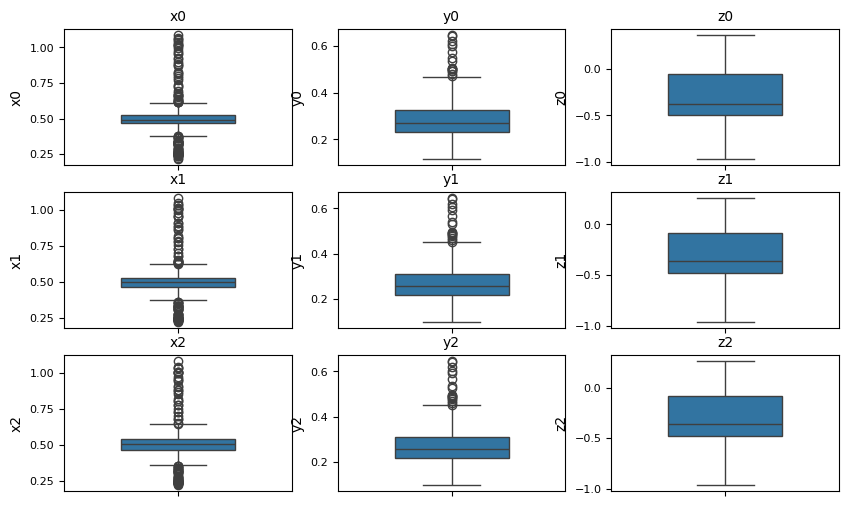

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar outliers con boxplots antes de la limpieza
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
for i, column in enumerate(df.columns[1:], 1):  # Ignorando 'label'
    plt.subplot(3, 3, i)  # Ajustar la disposición de los subplots
    sns.boxplot(y=df[column], width=0.5)  # Ajustar el ancho del boxplot
    plt.title(f'{column}', fontsize=10)  # Ajustar el tamaño del título
    plt.xticks(fontsize=8)  # Ajustar el tamaño de las etiquetas del eje x
    plt.yticks(fontsize=8)  # Ajustar el tamaño de las etiquetas del eje y
plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()

b. Identificación y Filtrado de Outliers
Ahora identificaremos y filtraremos los outliers utilizando el método del rango intercuartílico (IQR):

In [38]:
# Filtrar outliers usando IQR
for column in df.columns[1:]:  # Ignorando 'label'
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar el DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


C. Visualización de Outliers Después de la Limpieza

Después de limpiar los datos, visualizaremos nuevamente los outliers para ver cómo ha cambiado la distribución.

ValueError: num must be an integer with 1 <= num <= 30, not 31

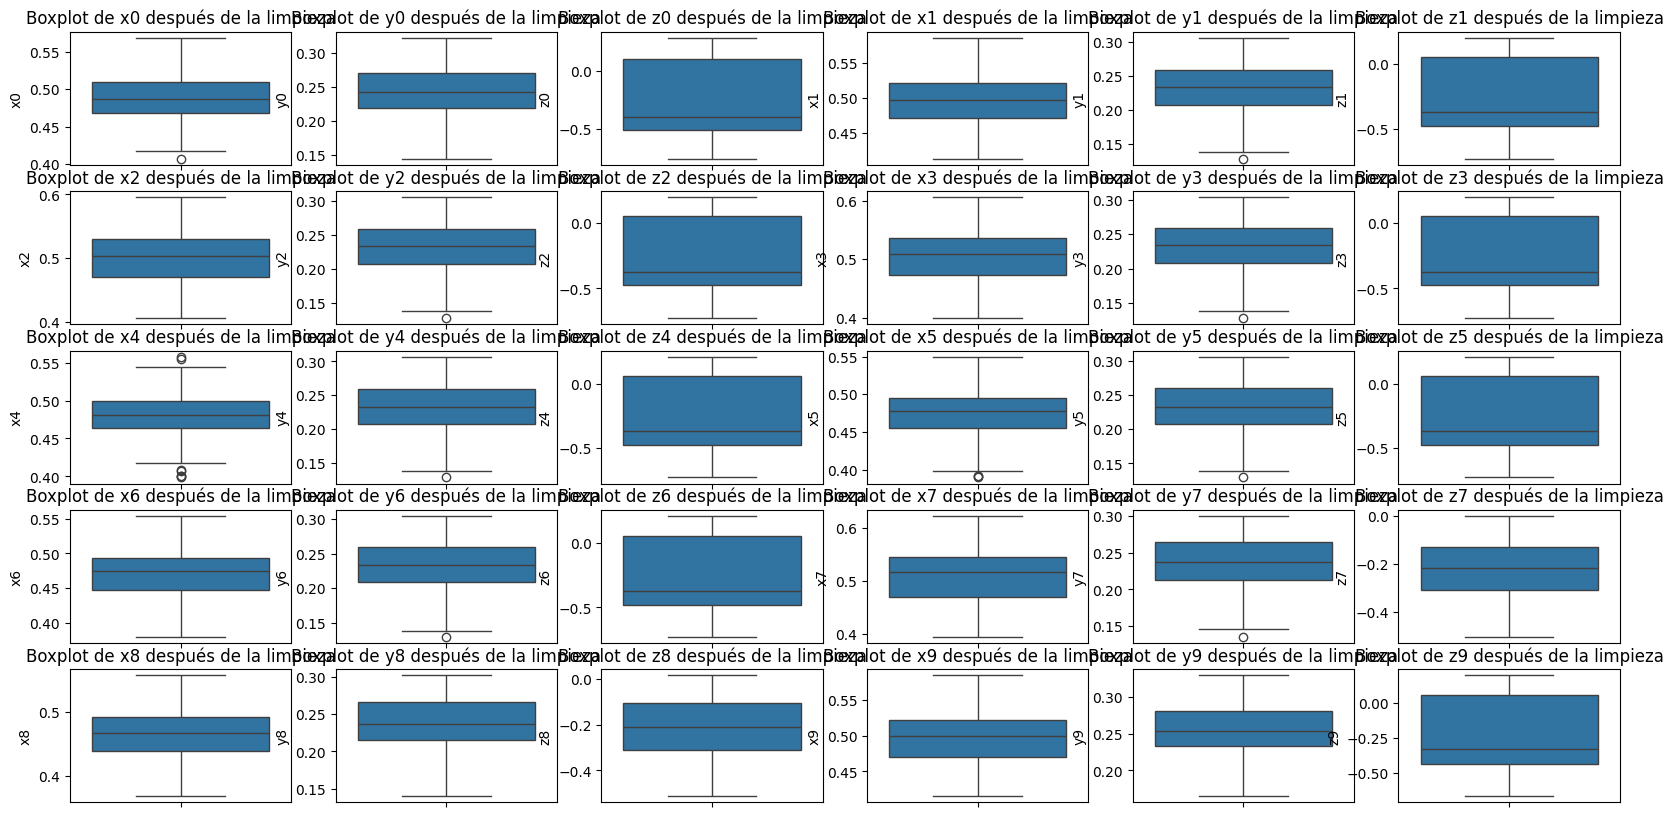

In [41]:
# Visualizar outliers con boxplots después de la limpieza
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns[1:], 1):  # Ignorando 'label'
    plt.subplot(5, 6, i)  # Ajustar el número de filas y columnas según el número de columnas
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column} después de la limpieza')
plt.tight_layout()
plt.show()


**Visualización Final de Resultados**
Finalmente, podemos visualizar algunas estadísticas descriptivas de los datos después de la limpieza

In [42]:
# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas después de la limpieza:")
print(df.describe())

Estadísticas descriptivas después de la limpieza:
               x0          y0          z0          x1          y1          z1  \
count  233.000000  233.000000  233.000000  233.000000  233.000000  233.000000   
mean     0.488880    0.243585   -0.282795    0.495965    0.232272   -0.281466   
std      0.029620    0.033957    0.300229    0.033950    0.035658    0.265390   
min      0.406635    0.143638   -0.755430    0.413394    0.128344   -0.726786   
25%      0.468638    0.219206   -0.503641    0.471606    0.208023   -0.477195   
50%      0.487103    0.241934   -0.393576    0.496400    0.234206   -0.372137   
75%      0.509067    0.269864    0.107730    0.520903    0.259140    0.052032   
max      0.568520    0.321940    0.282573    0.584720    0.306083    0.194401   

               x2          y2          z2          x3  ...         z29  \
count  233.000000  233.000000  233.000000  233.000000  ...  233.000000   
mean     0.500299    0.232324   -0.281482    0.503904  ...    0.414110  

#3. Normalizar


 La normalización es el proceso de escalar las características de un conjunto de datos para que tengan una media de 0 y una desviación estándar de 1. Esto es especialmente útil para evitar que las diferencias en las escalas de las características afecten el rendimiento de algoritmos de aprendizaje automático.

In [43]:
def normalize_data(df):
    cols_to_normalize = df.columns[1:]  # Ignorando 'label'
    df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].mean()) / df[cols_to_normalize].std()
    return df

# 4. Filtrado


El filtrado implica aplicar técnicas para suavizar las señales y reducir el ruido. Un filtro de Savitzky-Golay es una técnica popular que se utiliza para suavizar los datos mientras se preservan características importantes como picos y valles.

In [51]:
pip install scipy

In [52]:
from scipy.signal import savgol_filter
def smooth_data(df, window_length=5, polyorder=2):
    cols_to_smooth = df.columns[1:]  # Ignorando 'label'
    for column in cols_to_smooth:
        df[column] = savgol_filter(df[column], window_length, polyorder)
    return df

# 5. Generación de Características


La generación de características es el proceso de extraer atributos relevantes de los datos que pueden ser utilizados por un modelo de aprendizaje automático para hacer predicciones. Algunos ejemplos incluyen la velocidad de las articulaciones, los ángulos relativos entre ellas y la inclinación del tronco.

In [53]:
import numpy as np
def generate_features(df):
    # Velocidad de las articulaciones
    cols = df.columns[1:]  # Ignorando 'label'
    for i in range(1, len(cols), 3):  # Asumiendo que x, y, z están en columnas consecutivas
        if i + 3 < len(cols):
            # Calcular velocidad
            df[f'vel_{cols[i]}'] = np.sqrt((df[cols[i]] - df[cols[i-3]]).pow(2) +
                                            (df[cols[i+1]] - df[cols[i-2]]).pow(2) +
                                            (df[cols[i+2]] - df[cols[i-1]]).pow(2))

    # Calcular ángulos entre articulaciones (ejemplo)
    df['angle_0_1'] = np.degrees(np.arctan2(df['y1'] - df['y0'], df['x1'] - df['x0']))

    # Inclinación del tronco (ejemplo)
    df['inclination'] = np.degrees(np.arctan2(df['y2'] - df['y0'], df['x2'] - df['x0']))

    return df

Explicacion de Métodos:

- normalize_data(df): Normaliza las coordenadas de las articulaciones para tener una media de 0 y desviación estándar de 1.
- smooth_data(df, window_length=5, polyorder=2): Aplica un filtro de  Savitzky-Golay a las coordenadas para suavizar los datos y reducir el ruido.
- generate_features(df): Extrae características útiles como la velocidad de las articulaciones, los ángulos entre ellas y la inclinación del tronco.

# Implementación Completa

In [54]:
# Normalizar los datos
data_normalized = normalize_data(df.copy())

# Suavizar los datos
data_smoothed = smooth_data(data_normalized.copy())

# Generar características
data_features = generate_features(data_smoothed.copy())

# 6. Entrenamiento del Sistema de Clasificación

Separación de Características y Etiquetas

Objetivo: Separar las características (X) de las etiquetas (y) para el entrenamiento del modelo.

In [56]:
# Separar características y etiquetas
X = data_features.drop(columns=['label'])  # Características (todas menos 'label')
y = data_features['label']  # Etiquetas (clases de actividades)

# Verificar la forma de X e y
print(f'Shape de X: {X.shape}')
print(f'Shape de y: {y.shape}')

Shape de X: (233, 133)
Shape de y: (233,)


División de Datos

Objetivo: Dividir los datos en conjuntos de entrenamiento y prueba. Esto permite evaluar el modelo en datos no vistos.

In [57]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f'Shape de X_train: {X_train.shape}')
print(f'Shape de X_test: {X_test.shape}')


Shape de X_train: (186, 133)
Shape de X_test: (47, 133)


Escalado de Características

Objetivo: Escalar las características para que tengan una media de 0 y una desviación estándar de 1. Esto es importante para SVM.

In [58]:
from sklearn.preprocessing import StandardScaler

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta el escalador y transforma los datos de entrenamiento
X_test = scaler.transform(X_test)        # Transforma los datos de prueba

# Verificar los datos escalados
print(f'Primeras filas de X_train escalado:\n{X_train[:5]}')
print(f'Primeras filas de X_test escalado:\n{X_test[:5]}')


Primeras filas de X_train escalado:
[[ 5.64309395e-01 -2.01872522e-01 -7.58849878e-01  5.05149545e-01
  -8.95404150e-02 -7.80863778e-01  4.74958192e-01 -8.95503998e-02
  -7.80843454e-01  4.53883146e-01 -9.24384666e-02 -7.80972924e-01
   5.69825856e-01 -9.17238486e-02 -7.87525243e-01  5.30159963e-01
  -9.17889496e-02 -7.87662325e-01  4.64520107e-01 -9.32819369e-02
  -7.87871271e-01  4.38590979e-01 -1.69201985e-01 -9.29161162e-01
   3.79549429e-01 -1.77666323e-01 -9.42000559e-01  4.84212819e-01
  -3.60946464e-01 -7.80394563e-01  5.63165279e-01 -3.52243120e-01
  -7.92943944e-01  3.28845892e-01 -1.17360077e+00 -2.87623106e-01
  -1.30589095e-02 -1.14315074e+00 -5.56206463e-01  3.13940172e-01
  -1.60856648e+00 -3.23549344e-01 -1.48531152e-01 -1.48253140e+00
  -3.10741321e-01  2.32783228e-01 -1.48600833e+00 -1.28293963e+00
  -2.20716749e-01 -1.37921511e+00 -6.51121623e-01  1.76292718e-01
  -1.45392351e+00 -1.21133784e+00 -2.24060722e-01 -1.33895725e+00
  -6.56267215e-01  1.86062381e-01 -1.460

Elección del Modelo

Objetivo: Crear una instancia del clasificador SVM. Se puede ajustar el tipo de kernel según el problema.

In [59]:
from sklearn.svm import SVC

# Elección del modelo: SVM
model = SVC(kernel='linear')  # Cambiar a 'rbf', 'poly', etc., si es necesario

# Imprimir la configuración del modelo
print(model)


SVC(kernel='linear')


Entrenamiento del Modelo

Objetivo: Entrenar el modelo SVM utilizando los datos de entrenamiento.

In [60]:
# Entrenamiento del modelo
model.fit(X_train, y_train)

# Imprimir mensaje de entrenamiento completado
print("Modelo entrenado.")


Modelo entrenado.


Predicción

Objetivo: Hacer predicciones sobre el conjunto de prueba.

In [61]:
# Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir las primeras predicciones
print(f'Primeras predicciones: {y_pred[:5]}')


Primeras predicciones: ['CaminandoFrontal_01' 'Sentandose_01' 'Sentandose_01'
 'CaminandoEspalda_01' 'CaminandoFrontal_03']


Evaluación del Modelo

Objetivo: Evaluar el rendimiento del modelo utilizando métricas como precisión y un informe de clasificación.

In [62]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Informe de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.89
                     precision    recall  f1-score   support

CaminandoEspalda_01       1.00      1.00      1.00         3
CaminandoEspalda_02       1.00      0.80      0.89         5
CaminandoEspalda_03       1.00      1.00      1.00         2
CaminandoEspalda_04       0.67      1.00      0.80         2
CaminandoFrontal_01       1.00      1.00      1.00         5
CaminandoFrontal_02       1.00      1.00      1.00         3
CaminandoFrontal_03       0.67      0.50      0.57         4
CaminandoFrontal_04       0.86      0.86      0.86         7
         Girando_01       1.00      1.00      1.00         1
         Girando_03       1.00      1.00      1.00         2
         Girando_04       1.00      1.00      1.00         1
       Parandose_01       1.00      1.00      1.00         2
       Parandose_02       1.00      1.00      1.00         2
       Parandose_03       1.00      1.00      1.00         2
       Parandose_04       1.00      1.00      1.00         2
      Se

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
